#2D CNN

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 26s 9s/step - accuracy: 0.4807 - loss: 1.0009 - val_accuracy: 0.5000 - val_loss: 0.7854
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.5000 - loss: 0.7448 - val_accuracy: 0.5000 - val_loss: 0.7032
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6187 - loss: 0.6659 - val_accuracy: 0.5000 - val_loss: 0.6975
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5499 - loss: 0.6879 - val_accuracy: 0.5000 - val_loss: 0.6941
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.5000 - loss: 0.6947 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.4910 - loss: 0.6940 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4774 - loss: 0.6964 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5430 - loss: 0.6887 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 9/20
3/3 ━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


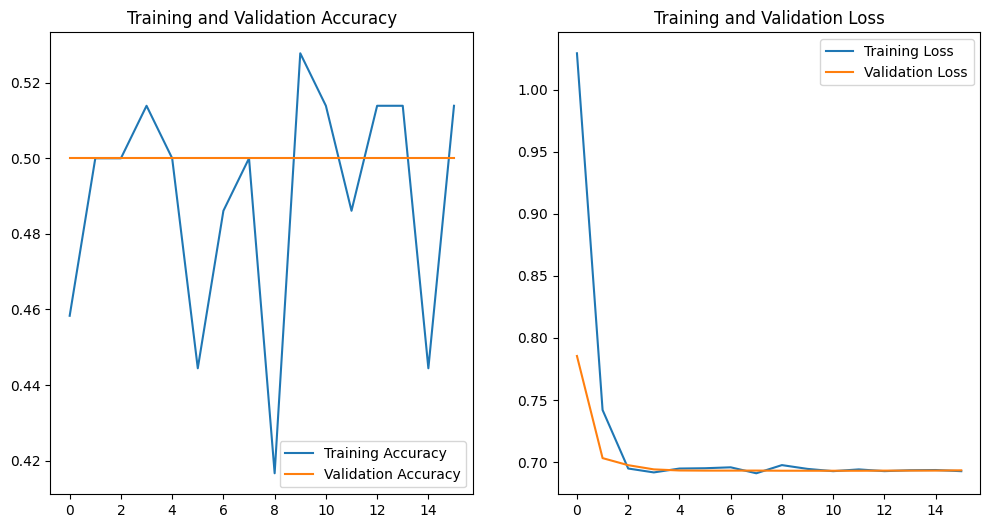

In [ ]:
# normalise,resize,grayscale conversion

from google.colab import drive
drive.mount('/content/drive')

# Step 1: Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import os

# Step 2: Define paths for the dataset
train_dir = '/content/drive/MyDrive/Parkinson hand drawing/spiral/training'
test_dir = '/content/drive/MyDrive/Parkinson hand drawing/spiral/testing'

# Step 3: Set up ImageDataGenerator for preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'  # Use 'categorical' if you have more than 2 classes
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Step 4: Build the 2D CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Use 'softmax' for multiple classes
])

# Step 5: Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 6: Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=20,
    callbacks=[early_stopping]
)

# Step 7: Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc:.4f}')

# Step 8: Make predictions and generate a classification report
Y_pred = model.predict(test_generator)
y_pred = np.round(Y_pred).astype(int).reshape(-1)
y_true = test_generator.classes

print('Classification Report')
print(classification_report(y_true, y_pred, target_names=['Healthy', 'Parkinson']))

# Step 9: Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print('Confusion Matrix')
print(conf_matrix)

# Step 10: Plot training & validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()




In [ ]:
import os

def print_folder_structure(root_dir, indent=''):
    # List the contents of the directory
    items = os.listdir(root_dir)
    # Loop through each item in the directory
    for idx, item in enumerate(items):
        # Get the full path of the item
        item_path = os.path.join(root_dir, item)
        # Check if the item is a directory
        if os.path.isdir(item_path):
            # Add prefix └── for the last item and ├── for others
            prefix = '└── ' if idx == len(items) - 1 else '├── '
            # Print the current directory with indentation
            print(indent + prefix + item)
            # Update the indentation and recursively print subdirectories
            new_indent = indent + ('    ' if idx == len(items) - 1 else '│   ')
            print_folder_structure(item_path, new_indent)

# Directory containing your dataset (change this to your dataset's root directory)
dataset_dir = '/content/drive/MyDrive/Parkinson hand drawing/spiral'

# Print the dataset folder structure
print("Dataset Folder Structure:")
print_folder_structure(dataset_dir)


Dataset Folder Structure:
├── testing
│   ├── parkinson
│   └── healthy
└── training
    ├── healthy
    └── parkinson


#1D CNN

In [ ]:
# Step 1: Import necessary libraries
import cv2
import numpy as np
import os
from skimage.feature import hog
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Step 2: Define paths for the dataset
train_dir = '/content/drive/MyDrive/Parkinson hand drawing/spiral/training'
test_dir = '/content/drive/MyDrive/Parkinson hand drawing/spiral/testing'

# Step 3: Function to extract HOG features from grayscale images
def extract_hog_features(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    hog_features, _ = hog(gray_image, orientations=9, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2), visualize=True)
    return hog_features

# Step 4: Load and preprocess the dataset
def load_dataset(directory):
    data = []
    labels = []
    for class_label in os.listdir(directory):
        class_dir = os.path.join(directory, class_label)
        for img_file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_file)
            image = cv2.imread(img_path)
            image = cv2.resize(image, (128, 128))  # Resize for consistency
            hog_features = extract_hog_features(image)
            data.append(hog_features)
            labels.append(class_label)
    return np.array(data), np.array(labels)

# Load training and testing datasets
X_train, y_train = load_dataset(train_dir)
X_test, y_test = load_dataset(test_dir)

# Step 5: Encode labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Reshape the HOG features to fit 1D CNN input requirements
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Step 6: Build the 1D CNN model
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Step 7: Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 8: Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

# Step 9: Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

# Step 10: Make predictions and generate a classification report
y_pred = np.round(model.predict(X_test)).astype(int).reshape(-1)

print('Classification Report')
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Step 11: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(conf_matrix)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5078 - loss: 0.8804 - val_accuracy: 0.5000 - val_loss: 0.8270
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 735ms/step - accuracy: 0.4735 - loss: 0.8909 - val_accuracy: 0.5000 - val_loss: 0.6797
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 751ms/step - accuracy: 0.5582 - loss: 0.6681 - val_accuracy: 0.5000 - val_loss: 0.6662
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6740 - loss: 0.5923 - val_accuracy: 0.6333 - val_loss: 0.6294
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 701ms/step - accuracy: 0.8602 - loss: 0.5307 - val_accuracy: 0.7667 - val_loss: 0.5923
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 729ms/step - accuracy: 0.7804 - loss: 0.5181 - val_accuracy: 0.7333 - val_loss: 0.5606
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8663 - loss: 0.4082 - val_accuracy: 0.7000 - val_loss: 0.5508
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.8850 - loss: 0.3533 - val_accuracy: 0.7000 - val_loss: 0.5321
Epoc

# FEATURE EXTRACTION


In [ ]:
from google.colab import drive
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from skimage.feature import hog
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

drive.mount('/content/drive')

# Step 1: Import necessary libraries

# Step 2: Define paths for the dataset
train_dir = '/content/drive/MyDrive/Parkinson hand drawing/spiral/training'
test_dir = '/content/drive/MyDrive/Parkinson hand drawing/spiral/testing'

# Step 3: Function to extract HOG features from grayscale images
def extract_hog_features(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    hog_features, _ = hog(gray_image, orientations=9, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2), visualize=True)
    return hog_features

# Step 4: Function to extract SIFT/ORB features
def extract_sift_orb_features(image, method='sift'):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    if method == 'sift':
        descriptor = cv2.SIFT_create()
    elif method == 'orb':
        descriptor = cv2.ORB_create()
    else:
        raise ValueError("Invalid method. Choose 'sift' or 'orb'.")
    keypoints, features = descriptor.detectAndCompute(gray_image, None)
    if features is not None:
        features = np.mean(features, axis=0)  # Average features for simplicity
    else:
        features = np.zeros(descriptor.descriptorSize())  # Handle cases with no keypoints
    return features

# Step 5: Function to detect edges using Canny edge detection
def extract_edge_features(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray_image, 100, 200)  # Adjust thresholds as needed
    # Flatten the edge image to create a feature vector
    edge_features = edges.flatten()
    return edge_features

# Step 6: Load and preprocess the dataset
def load_dataset(directory, feature_extractor='hog'):
    data = []
    labels = []
    for class_label in os.listdir(directory):
        class_dir = os.path.join(directory, class_label)
        for img_file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_file)
            image = cv2.imread(img_path)
            image = cv2.resize(image, (128, 128))  # Resize for consistency
            if feature_extractor == 'hog':
                features = extract_hog_features(image)
            elif feature_extractor == 'sift':
                features = extract_sift_orb_features(image, 'sift')
            elif feature_extractor == 'orb':
                features = extract_sift_orb_features(image, 'orb')
            elif feature_extractor == 'edge':
                features = extract_edge_features(image)
            else:
                raise ValueError("Invalid feature extractor.")
            data.append(features)
            labels.append(class_label)
    return np.array(data), np.array(labels)

# Load training and testing datasets using different feature extractors
X_train_hog, y_train = load_dataset(train_dir, 'hog')
X_test_hog, y_test = load_dataset(test_dir, 'hog')

X_train_sift, _ = load_dataset(train_dir, 'sift')
X_test_sift, _ = load_dataset(test_dir, 'sift')

X_train_orb, _ = load_dataset(train_dir, 'orb')
X_test_orb, _ = load_dataset(test_dir, 'orb')

X_train_edge, _ = load_dataset(train_dir, 'edge')
X_test_edge, _ = load_dataset(test_dir, 'edge')

# Step 7: Encode labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Reshape HOG features for 1D CNN
X_train_hog = X_train_hog.reshape(X_train_hog.shape[0], X_train_hog.shape[1], 1)
X_test_hog = X_test_hog.reshape(X_test_hog.shape[0], X_test_hog.shape[1], 1)

# Step 8: Build and train 1D CNN model for HOG features
model_hog = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_hog.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model_hog.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
history_hog = model_hog.fit(X_train_hog, y_train, validation_data=(X_test_hog, y_test), epochs=20, batch_size=32)

# Step 9: Evaluate 1D CNN model for HOG features
test_loss_hog, test_acc_hog = model_hog.evaluate(X_test_hog, y_test)
print(f'Test accuracy (HOG): {test_acc_hog:.4f}')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 630ms/step - accuracy: 0.3958 - loss: 1.0003 - val_accuracy: 0.5000 - val_loss: 1.1573
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 367ms/step - accuracy: 0.6497 - loss: 0.8092 - val_accuracy: 0.5000 - val_loss: 1.0085
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 445ms/step - accuracy: 0.5699 - loss: 1.0639 - val_accuracy: 0.7000 - val_loss: 0.5631
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 423ms/step - accuracy: 0.6840 - loss: 0.6328 - val_accuracy: 0.6667 - val_loss: 0.6158
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 430ms/step - accuracy: 0.7422 - loss: 0.5179 - val_accuracy: 0.6333 - val_loss: 0.5934
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 415ms/step - accuracy: 0.7383 - loss: 0.4937 - val_accuracy: 0.6333 - val_loss: 0.5954
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 528ms/step - accuracy: 0.8485 - loss: 0.4312 - val_accuracy: 0.7667 - val_loss: 0.5462
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 444ms/step - accuracy: 0.8455 - loss: 0.3740 - val_accuracy: 0.7333 - val_loss:

#spiral


In [ ]:
from google.colab import drive
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import os
import cv2
from skimage.feature import hog
from sklearn.base import BaseEstimator, ClassifierMixin

drive.mount('/content/drive')

# Paths for dataset
train_dir = '/content/drive/MyDrive/Parkinson hand drawing/spiral/training'
test_dir = '/content/drive/MyDrive/Parkinson hand drawing/spiral/testing'

# Feature extraction functions (HOG, SIFT, ORB, Edge)
def extract_hog_features(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hog_features, _ = hog(gray_image, orientations=9, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2), visualize=True)
    return hog_features

def extract_sift_orb_features(image, method='sift'):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    if method == 'sift':
        descriptor = cv2.SIFT_create()
    elif method == 'orb':
        descriptor = cv2.ORB_create()
    else:
        raise ValueError("Invalid method. Choose 'sift' or 'orb'.")
    keypoints, features = descriptor.detectAndCompute(gray_image, None)
    if features is not None:
        features = np.mean(features, axis=0)
    else:
        features = np.zeros(descriptor.descriptorSize())
    return features

def extract_edge_features(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray_image, 100, 200)
    return edges.flatten()

# Load and preprocess dataset
def load_dataset(directory, feature_extractor='hog'):
    data, labels = [], []
    for class_label in os.listdir(directory):
        class_dir = os.path.join(directory, class_label)
        for img_file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_file)
            image = cv2.imread(img_path)
            image = cv2.resize(image, (128, 128))
            if feature_extractor == 'hog':
                features = extract_hog_features(image)
            elif feature_extractor == 'sift':
                features = extract_sift_orb_features(image, 'sift')
            elif feature_extractor == 'orb':
                features = extract_sift_orb_features(image, 'orb')
            elif feature_extractor == 'edge':
                features = extract_edge_features(image)
            else:
                raise ValueError("Invalid feature extractor.")
            data.append(features)
            labels.append(class_label)
    return np.array(data), np.array(labels)

# Load datasets for each feature extractor
X_train_hog, y_train = load_dataset(train_dir, 'hog')
X_test_hog, y_test = load_dataset(test_dir, 'hog')

X_train_sift, _ = load_dataset(train_dir, 'sift')
X_test_sift, _ = load_dataset(test_dir, 'sift')

X_train_orb, _ = load_dataset(train_dir, 'orb')
X_test_orb, _ = load_dataset(test_dir, 'orb')

X_train_edge, _ = load_dataset(train_dir, 'edge')
X_test_edge, _ = load_dataset(test_dir, 'edge')

# Encode labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Reshape features for 1D CNN
X_train_hog = X_train_hog.reshape(X_train_hog.shape[0], X_train_hog.shape[1], 1)
X_test_hog = X_test_hog.reshape(X_test_hog.shape[0], X_test_hog.shape[1], 1)

X_train_sift = X_train_sift.reshape(X_train_sift.shape[0], X_train_sift.shape[1], 1)
X_test_sift = X_test_sift.reshape(X_test_sift.shape[0], X_test_sift.shape[1], 1)

X_train_orb = X_train_orb.reshape(X_train_orb.shape[0], X_train_orb.shape[1], 1)
X_test_orb = X_test_orb.reshape(X_test_orb.shape[0], X_test_orb.shape[1], 1)

X_train_edge = X_train_edge.reshape(X_train_edge.shape[0], X_train_edge.shape[1], 1)
X_test_edge = X_test_edge.reshape(X_test_edge.shape[0], X_test_edge.shape[1], 1)

# Build 1D CNN model function
def build_1d_cnn(input_shape):
    model = Sequential([
        Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Train and evaluate models for each feature set
def train_and_evaluate_model(X_train, y_train, X_test, y_test, feature_name):
    model = build_1d_cnn((X_train.shape[1], 1))
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f'Test accuracy ({feature_name}): {test_acc:.4f}')
    return model, test_acc

# Train individual models
model_hog, acc_hog = train_and_evaluate_model(X_train_hog, y_train, X_test_hog, y_test, 'HOG')
model_sift, acc_sift = train_and_evaluate_model(X_train_sift, y_train, X_test_sift, y_test, 'SIFT')
model_orb, acc_orb = train_and_evaluate_model(X_train_orb, y_train, X_test_orb, y_test, 'ORB')
model_edge, acc_edge = train_and_evaluate_model(X_train_edge, y_train, X_test_edge, y_test, 'Edge')


Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test accuracy (HOG): 0.8333
Test accuracy (SIFT): 0.9333
Test accuracy (ORB): 0.5333
Test accuracy (Edge): 0.7000


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


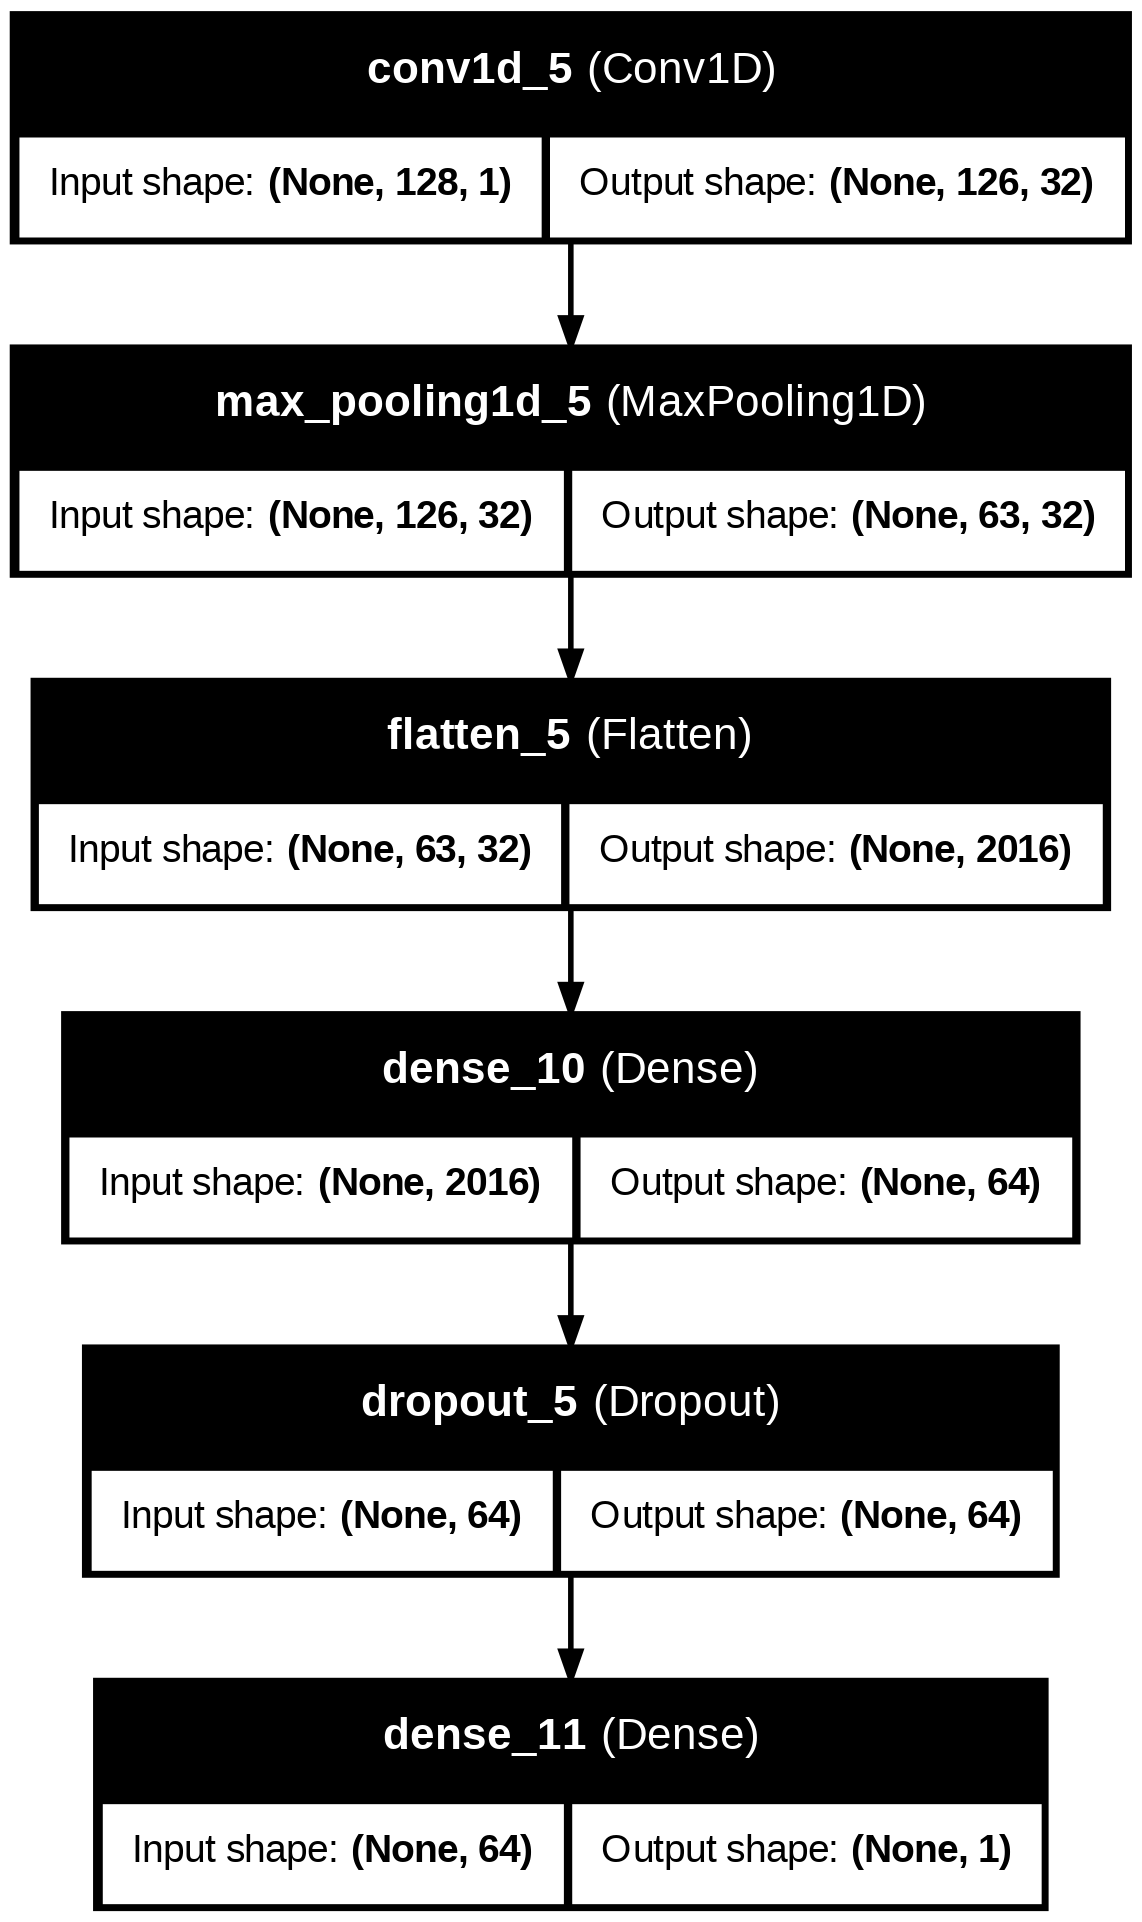

In [ ]:
!pip install pydot
!apt-get install graphviz
from tensorflow.keras.utils import plot_model

plot_model(model_sift, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


#CONFUSION MATRIX



In [ ]:
#  check accuracy,precision ,f1 score,recall ,specificity,cohens kappa


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, cohen_kappa_score

# Predict using the SIFT model
y_pred_sift = np.round(model_sift.predict(X_test_sift)).astype(int).reshape(-1)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_sift)
precision = precision_score(y_test, y_pred_sift)
recall = recall_score(y_test, y_pred_sift)
f1 = f1_score(y_test, y_pred_sift)

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_sift).ravel()
specificity = tn / (tn + fp)

# Calculate Cohen's kappa
kappa = cohen_kappa_score(y_test, y_pred_sift)

# Print results
print("Metrics for SIFT Model:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Cohen's Kappa: {kappa:.4f}")

# Confusion Matrix
print("\nConfusion Matrix (SIFT):")
print(confusion_matrix(y_test, y_pred_sift))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
Metrics for SIFT Model:
Accuracy: 0.9333
Precision: 0.9333
Recall: 0.9333
F1-score: 0.9333
Specificity: 0.9333
Cohen's Kappa: 0.8667

Confusion Matrix (SIFT):
[[14  1]
 [ 1 14]]


In [ ]:
!pip install tensorflow-addons


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.3.1 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [ ]:
# all evaluation metrics for sift

# Make predictions using the SIFT model
y_pred_sift = np.round(model_sift.predict(X_test_sift)).astype(int).reshape(-1)

# Generate classification report for SIFT
print('Classification Report (SIFT)')
print(classification_report(y_test, y_pred_sift, target_names=le.classes_))

# Generate confusion matrix for SIFT
conf_matrix_sift = confusion_matrix(y_test, y_pred_sift)
print('Confusion Matrix (SIFT)')
print(conf_matrix_sift)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Classification Report (SIFT)
              precision    recall  f1-score   support

     healthy       0.93      0.93      0.93        15
   parkinson       0.93      0.93      0.93        15

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Confusion Matrix (SIFT)
[[14  1]
 [ 1 14]]


In [ ]:
from google.colab import drive
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import os
import cv2
from skimage.feature import hog
from sklearn.base import BaseEstimator, ClassifierMixin

drive.mount('/content/drive')

# Paths for dataset
train_dir = '/content/drive/MyDrive/Parkinson hand drawing/spiral/training'
test_dir = '/content/drive/MyDrive/Parkinson hand drawing/spiral/testing'

# Feature extraction functions (HOG, SIFT, ORB, Edge)
def extract_hog_features(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hog_features, _ = hog(gray_image, orientations=9, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2), visualize=True)
    return hog_features

def extract_sift_orb_features(image, method='sift'):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    if method == 'sift':
        descriptor = cv2.SIFT_create()
    elif method == 'orb':
        descriptor = cv2.ORB_create()
    else:
        raise ValueError("Invalid method. Choose 'sift' or 'orb'.")
    keypoints, features = descriptor.detectAndCompute(gray_image, None)
    if features is not None:
        features = np.mean(features, axis=0)
    else:
        features = np.zeros(descriptor.descriptorSize())
    return features

def extract_edge_features(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray_image, 100, 200)
    return edges.flatten()

# Load and preprocess dataset
def load_dataset(directory, feature_extractor='hog'):
    data, labels = [], []
    for class_label in os.listdir(directory):
        class_dir = os.path.join(directory, class_label)
        for img_file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_file)
            image = cv2.imread(img_path)
            image = cv2.resize(image, (128, 128))
            if feature_extractor == 'hog':
                features = extract_hog_features(image)
            elif feature_extractor == 'sift':
                features = extract_sift_orb_features(image, 'sift')
            elif feature_extractor == 'orb':
                features = extract_sift_orb_features(image, 'orb')
            elif feature_extractor == 'edge':
                features = extract_edge_features(image)
            else:
                raise ValueError("Invalid feature extractor.")
            data.append(features)
            labels.append(class_label)
    return np.array(data), np.array(labels)

# Load datasets for each feature extractor
X_train_hog, y_train = load_dataset(train_dir, 'hog')
X_test_hog, y_test = load_dataset(test_dir, 'hog')

X_train_sift, _ = load_dataset(train_dir, 'sift')
X_test_sift, _ = load_dataset(test_dir, 'sift')

X_train_orb, _ = load_dataset(train_dir, 'orb')
X_test_orb, _ = load_dataset(test_dir, 'orb')

X_train_edge, _ = load_dataset(train_dir, 'edge')
X_test_edge, _ = load_dataset(test_dir, 'edge')

# Encode labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Reshape features for 1D CNN
X_train_hog = X_train_hog.reshape(X_train_hog.shape[0], X_train_hog.shape[1], 1)
X_test_hog = X_test_hog.reshape(X_test_hog.shape[0], X_test_hog.shape[1], 1)

X_train_sift = X_train_sift.reshape(X_train_sift.shape[0], X_train_sift.shape[1], 1)
X_test_sift = X_test_sift.reshape(X_test_sift.shape[0], X_test_sift.shape[1], 1)

X_train_orb = X_train_orb.reshape(X_train_orb.shape[0], X_train_orb.shape[1], 1)
X_test_orb = X_test_orb.reshape(X_test_orb.shape[0], X_test_orb.shape[1], 1)

X_train_edge = X_train_edge.reshape(X_train_edge.shape[0], X_train_edge.shape[1], 1)
X_test_edge = X_test_edge.reshape(X_test_edge.shape[0], X_test_edge.shape[1], 1)

# Build 1D CNN model function
def build_1d_cnn(input_shape):
    model = Sequential([
        Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Train and evaluate models for each feature set
def train_and_evaluate_model(X_train, y_train, X_test, y_test, feature_name):
    model = build_1d_cnn((X_train.shape[1], 1))
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f'Test accuracy ({feature_name}): {test_acc:.4f}')
    return model, test_acc

model_hog, acc_hog = train_and_evaluate_model(X_train_hog, y_train, X_test_hog, y_test, 'HOG')
model_sift, acc_sift = train_and_evaluate_model(X_train_sift, y_train, X_test_sift, y_test, 'SIFT')
model_orb, acc_orb = train_and_evaluate_model(X_train_orb, y_train, X_test_orb, y_test, 'ORB')
model_edge, acc_edge = train_and_evaluate_model(X_train_edge, y_train, X_test_edge, y_test, 'Edge')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test accuracy (HOG): 0.8000
Test accuracy (SIFT): 0.9333
Test accuracy (ORB): 0.6333
Test accuracy (Edge): 0.6667


#SIFT

In [ ]:
from tensorflow.keras.models import save_model

# Train and evaluate models for each feature set with model saving and logging
def train_and_evaluate_model(X_train, y_train, X_test, y_test, feature_name):
    model = build_1d_cnn((X_train.shape[1], 1))
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f'Test accuracy ({feature_name}): {test_acc:.4f}')

    # Check if the accuracy is greater than 93%
    if test_acc > 0.93:
        # Save the model
        model_save_path = f'/content/drive/MyDrive/models/{feature_name}_model_new.h5'
        save_model(model, model_save_path)
        print(f'Model saved as {model_save_path}')

    return model, test_acc

# Train and evaluate the SIFT-based model and save if accuracy is above threshold
model_sift, acc_sift = train_and_evaluate_model(X_train_sift, y_train, X_test_sift, y_test, 'SIFT')

# Repeat the process for other feature extractors if needed


Test accuracy (SIFT): 0.9333
Model saved as /content/drive/MyDrive/models/SIFT_model.h5
Feature and accuracy logged to /content/drive/MyDrive/models/feature_log.txt


In [ ]:
import pandas as pd

# Function to save features and labels to a CSV file
def save_features_to_csv(features, labels, feature_name, output_path):
    # Combine features and labels into a DataFrame
    df = pd.DataFrame(features)
    df['label'] = labels  # Add labels as the last column
    # Save to CSV
    csv_file_path = f'{output_path}/{feature_name}_features_new.csv'
    df.to_csv(csv_file_path, index=False)
    print(f'Features saved to {csv_file_path}')

# Modify the dataset loading function to include saving features
def load_and_save_dataset(directory, feature_extractor='sift', output_path='/content/drive/MyDrive'):
    data, labels = [], []
    for class_label in os.listdir(directory):
        class_dir = os.path.join(directory, class_label)
        for img_file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_file)
            image = cv2.imread(img_path)
            image = cv2.resize(image, (128, 128))
            if feature_extractor == 'sift':
                features = extract_sift_orb_features(image, 'sift')
            elif feature_extractor == 'hog':
                features = extract_hog_features(image)
            elif feature_extractor == 'orb':
                features = extract_sift_orb_features(image, 'orb')
            elif feature_extractor == 'edge':
                features = extract_edge_features(image)
            else:
                raise ValueError("Invalid feature extractor.")

            data.append(features)
            labels.append(class_label)

    # Convert to numpy arrays
    data = np.array(data)
    labels = np.array(labels)

    # Save the extracted features and labels to a CSV file
    save_features_to_csv(data, labels, feature_extractor, output_path)

    return data, labels

# Load the dataset and save the SIFT features
X_train_sift, y_train_sift = load_and_save_dataset(train_dir, 'sift')
X_test_sift, y_test_sift = load_and_save_dataset(test_dir, 'sift')


Features saved to /content/drive/MyDrive/sift_features.csv
Features saved to /content/drive/MyDrive/sift_features.csv


In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K

# Custom activation function (e.g., Leaky ReLU variant)
def custom_activation(x):
    return K.maximum(0.01 * x, x)

# Use this custom activation in a Keras model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam

# Define the 1D CNN model with the custom activation function
def build_1d_cnn_with_custom_activation(input_shape):
    model = Sequential([
        Conv1D(32, kernel_size=3, input_shape=input_shape),
        Activation(custom_activation),  # Apply custom activation here
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64),
        Activation(custom_activation),  # Custom activation in dense layers too
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # For binary classification
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

model_sift_custom, acc_sift_custom = train_and_evaluate_model(X_train_sift, y_train, X_test_sift, y_test, 'SIFT + Custom Activation')


Test accuracy (SIFT + Custom Activation): 0.9333
Model saved as /content/drive/MyDrive/models/SIFT + Custom Activation_model.h5
Feature and accuracy logged to /content/drive/MyDrive/models/feature_log.txt


# HYPER PARAMETER TUNING


In [ ]:
# Install Keras Tuner
!pip install keras-tuner

# Import Keras Tuner
import keras_tuner as kt

# Define the model-building function with hyperparameters
def build_model(hp):
    model = Sequential()
    model.add(Conv1D(
        filters=hp.Int('filters', min_value=16, max_value=128, step=16),
        kernel_size=hp.Choice('kernel_size', values=[3, 5, 7]),
        activation='relu',
        input_shape=(X_train_sift.shape[1], 1)
    ))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(
        units=hp.Int('units', min_value=32, max_value=256, step=32),
        activation='relu'
    ))
    model.add(Dropout(
        rate=hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)
    ))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=Adam(
            learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
        ),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initialize the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Increase for a more thorough search
    executions_per_trial=1,
    directory='my_dir',
    project_name='sift_cnn_tuning'
)

# Encode labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Reshape the SIFT features
X_train_sift = X_train_sift.reshape(X_train_sift.shape[0], X_train_sift.shape[1], 1)
X_test_sift = X_test_sift.reshape(X_test_sift.shape[0], X_test_sift.shape[1], 1)

# Run the hyperparameter search
tuner.search(X_train_sift, y_train_encoded, epochs=20, batch_size=32,
             validation_data=(X_test_sift, y_test_encoded))

# Retrieve the best hyperparameters
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

print('Best hyperparameters:')
print(f"Filters: {best_hp.get('filters')}")
print(f"Kernel Size: {best_hp.get('kernel_size')}")
print(f"Units: {best_hp.get('units')}")
print(f"Dropout Rate: {best_hp.get('dropout_rate')}")
print(f"Learning Rate: {best_hp.get('learning_rate')}")

# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hp)

# Train the model
history = model.fit(X_train_sift, y_train_encoded, epochs=20, batch_size=32,
                    validation_data=(X_test_sift, y_test_encoded))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_sift, y_test_encoded)
print(f"Test Accuracy: {test_acc:.4f}")


Trial 10 Complete [00h 00m 07s]
val_accuracy: 0.8999999761581421

Best val_accuracy So Far: 0.9666666388511658
Total elapsed time: 00h 01m 18s
Best hyperparameters:
Filters: 64
Kernel Size: 7
Units: 160
Dropout Rate: 0.1
Learning Rate: 0.002391706687008048
Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 644ms/step - accuracy: 0.5738 - loss: 21.6829 - val_accuracy: 0.7667 - val_loss: 2.3416
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6398 - loss: 3.8375 - val_accuracy: 0.9000 - val_loss: 0.6637
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6827 - loss: 1.6529 - val_accuracy: 0.9000 - val_loss: 0.6360
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5473 - loss: 4.1780 - val_accuracy: 0.9000 - val_loss: 0.5775
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6128 - loss: 2.5473 - val_accuracy: 0.9333 - val_loss: 0.5178
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6623 - loss: 2.2876 - val_accuracy: 0.7667 - val_loss

In [ ]:
# Define the best model architecture with the optimal hyperparameters
def build_best_model():
    model = Sequential()
    # Use the best hyperparameters
    model.add(Conv1D(
        filters=64,  # Best number of filters
        kernel_size=7,  # Best kernel size
        activation='relu',
        input_shape=(X_train_sift.shape[1], 1)
    ))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(
        units=160,  # Best number of units in Dense layer
        activation='relu'
    ))
    model.add(Dropout(rate=0.1))  # Best dropout rate
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with the best learning rate
    model.compile(optimizer=Adam(learning_rate=0.002391706687008048),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model
while test_acc<0.934:
# Build the model with the best hyperparameters
  best_model = build_best_model()

# Train the best model
  history = best_model.fit(X_train_sift, y_train_encoded, epochs=20, batch_size=32,
                         validation_data=(X_test_sift, y_test_encoded))

# Evaluate the model on the test data
  test_loss, test_acc = best_model.evaluate(X_test_sift, y_test_encoded)
  print(f"Test Accuracy: {test_acc:.4f}")

# Save the model if it performs well
if test_acc > 0.9334:
    model_save_path = '/content/drive/MyDrive/models/sift_best_model.h5'
    best_model.save(model_save_path)
    print(f'Model saved at {model_save_path}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 675ms/step - accuracy: 0.6011 - loss: 30.5559 - val_accuracy: 0.2333 - val_loss: 6.6346
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4214 - loss: 9.1208 - val_accuracy: 0.5000 - val_loss: 8.1479
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4648 - loss: 9.8778 - val_accuracy: 0.5000 - val_loss: 4.7989
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4874 - loss: 4.8228 - val_accuracy: 0.7667 - val_loss: 0.5949
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6298 - loss: 1.5592 - val_accuracy: 0.5000 - val_loss: 2.6901
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5078 - loss: 2.4793 - val_accuracy: 0.5000 - val_loss: 1.7609
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5729 - loss: 1.3608 - val_accuracy: 0.8667 - val_loss: 0.4671
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7053 - loss: 0.7837 - val_accuracy: 0.7667 - val_loss: 0.842

Test Accuracy: 0.9667
Model saved at /content/drive/MyDrive/models/sift_best_model.h5


In [ ]:
# Make predictions using the SIFT model
y_pred_sift = np.round(best_model.predict(X_test_sift)).astype(int).reshape(-1)

# Ensure target names are strings
target_names = [str(i) for i in le.classes_]  # Convert numerical classes to strings

# Generate classification report for SIFT
print('Classification Report (SIFT)')
print(classification_report(y_test, y_pred_sift, target_names=target_names))

# Generate confusion matrix for SIFT
conf_matrix_sift = confusion_matrix(y_test, y_pred_sift)
print('Confusion Matrix (SIFT)')
print(conf_matrix_sift)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Classification Report (SIFT)
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.94      1.00      0.97        15

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix (SIFT)
[[14  1]
 [ 0 15]]


#ROC

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


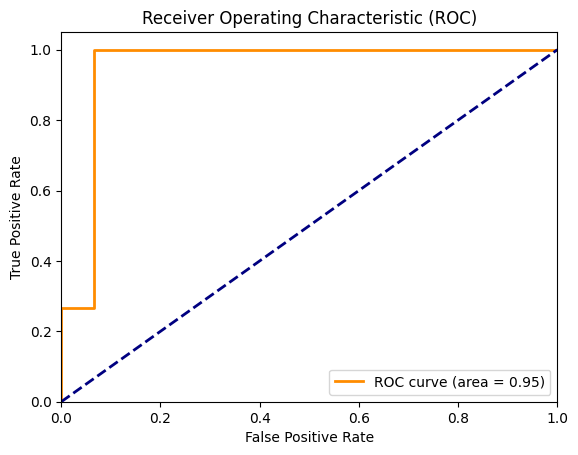

In [ ]:
# roc

from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Assuming you have already trained and evaluated your model (e.g., best_model)
# Load the saved model
# model = load_model('/content/drive/MyDrive/models/sift_best_model.h5')

# Make predictions on the test set
y_pred_prob_sift = best_model.predict(X_test_sift)

# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_prob_sift)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


#OTHER MODELS

In [ ]:
#  'Logistic Regression', 'Random Forest', 'XGBoost', 'SVM', '2d cnn', 'KNN'

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


# Create instances of the classifiers
logistic_regression = LogisticRegression(max_iter=1000)
random_forest = RandomForestClassifier()
xgboost = XGBClassifier()
svm = SVC(probability=True)
knn = KNeighborsClassifier()


# Define a function to train and evaluate a single model
def train_and_evaluate_sklearn_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train.reshape(X_train.shape[0], -1), y_train)
    y_pred = model.predict(X_test.reshape(X_test.shape[0], -1))
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {model_name}: {accuracy:.4f}")
    return model, accuracy

# Train and evaluate each model
model_lr, acc_lr = train_and_evaluate_sklearn_model(logistic_regression, X_train_hog, y_train, X_test_hog, y_test, 'Logistic Regression')
model_rf, acc_rf = train_and_evaluate_sklearn_model(random_forest, X_train_hog, y_train, X_test_hog, y_test, 'Random Forest')
model_xgb, acc_xgb = train_and_evaluate_sklearn_model(xgboost, X_train_hog, y_train, X_test_hog, y_test, 'XGBoost')
model_svm, acc_svm = train_and_evaluate_sklearn_model(svm, X_train_hog, y_train, X_test_hog, y_test, 'SVM')
model_knn, acc_knn = train_and_evaluate_sklearn_model(knn, X_train_hog, y_train, X_test_hog, y_test, 'KNN')



Accuracy of Logistic Regression: 0.8000
Accuracy of Random Forest: 0.7000
Accuracy of XGBoost: 0.7000
Accuracy of SVM: 0.7333
Accuracy of KNN: 0.8333


In [ ]:
#  2d cnn and its accuracy

from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Build 2D CNN model function
def build_2d_cnn(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Reshape features for 2D CNN
X_train_hog_2d = X_train_hog.reshape(X_train_hog.shape[0], X_train_hog.shape[1], 1, 1)
X_test_hog_2d = X_test_hog.reshape(X_test_hog.shape[0], X_test_hog.shape[1], 1, 1)

# Train and evaluate 2D CNN model
model_2d_cnn, acc_2d_cnn = train_and_evaluate_model(X_train_hog_2d, y_train, X_test_hog_2d, y_test, '2D CNN')

# Time Series Accuracy (using an example with LSTM)
from tensorflow.keras.layers import LSTM

# Reshape features for LSTM
X_train_hog_ts = X_train_hog.reshape(X_train_hog.shape[0], 1, X_train_hog.shape[1])
X_test_hog_ts = X_test_hog.reshape(X_test_hog.shape[0], 1, X_test_hog.shape[1])

def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(32, input_shape=input_shape),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


print(f"Accuracy of 2D CNN: {acc_2d_cnn:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test accuracy (2D CNN): 0.8333
Accuracy of 2D CNN: 0.8333


In [ ]:
#  accuracy , precision,recall,fscore,specificity ,cohens kappa' of logistic regression,random forest,xgboost,svm,2dcnn,knn

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, cohen_kappa_score

def evaluate_model(model, X_test, y_test, model_name):
  if isinstance(model, tf.keras.Sequential):  # Check if it's a Keras model
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)
  else:  # Assume it's a scikit-learn model
    y_pred = model.predict(X_test.reshape(X_test.shape[0], -1))

  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)
  tn, fp, fn, tp = cm.ravel()
  specificity = tn / (tn + fp)
  kappa = cohen_kappa_score(y_test, y_pred)

  print(f"{model_name}:")
  print(f"  Accuracy: {accuracy:.4f}")
  print(f"  Precision: {precision:.4f}")
  print(f"  Recall: {recall:.4f}")
  print(f"  F1-Score: {f1:.4f}")
  print(f"  Specificity: {specificity:.4f}")
  print(f"  Cohen's Kappa: {kappa:.4f}")
  print("-" * 20)

evaluate_model(model_lr, X_test_hog, y_test, 'Logistic Regression')
evaluate_model(model_rf, X_test_hog, y_test, 'Random Forest')
evaluate_model(model_xgb, X_test_hog, y_test, 'XGBoost')
evaluate_model(model_svm, X_test_hog, y_test, 'SVM')
evaluate_model(model_2d_cnn, X_test_hog_2d, y_test, '2D CNN')
evaluate_model(model_knn, X_test_hog, y_test, 'KNN')


Logistic Regression:
  Accuracy: 0.8000
  Precision: 0.7647
  Recall: 0.8667
  F1-Score: 0.8125
  Specificity: 0.7333
  Cohen's Kappa: 0.6000
--------------------
Random Forest:
  Accuracy: 0.7000
  Precision: 0.8000
  Recall: 0.5333
  F1-Score: 0.6400
  Specificity: 0.8667
  Cohen's Kappa: 0.4000
--------------------
XGBoost:
  Accuracy: 0.7000
  Precision: 0.8000
  Recall: 0.5333
  F1-Score: 0.6400
  Specificity: 0.8667
  Cohen's Kappa: 0.4000
--------------------
SVM:
  Accuracy: 0.7333
  Precision: 0.7059
  Recall: 0.8000
  F1-Score: 0.7500
  Specificity: 0.6667
  Cohen's Kappa: 0.4667
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
2D CNN:
  Accuracy: 0.8333
  Precision: 0.7778
  Recall: 0.9333
  F1-Score: 0.8485
  Specificity: 0.7333
  Cohen's Kappa: 0.6667
--------------------
KNN:
  Accuracy: 0.8333
  Precision: 0.9167
  Recall: 0.7333
  F1-Score: 0.8148
  Specificity: 0.9333
  Cohen's Kappa: 0.6667
--------------------


# OUTPUT COMPARISON

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


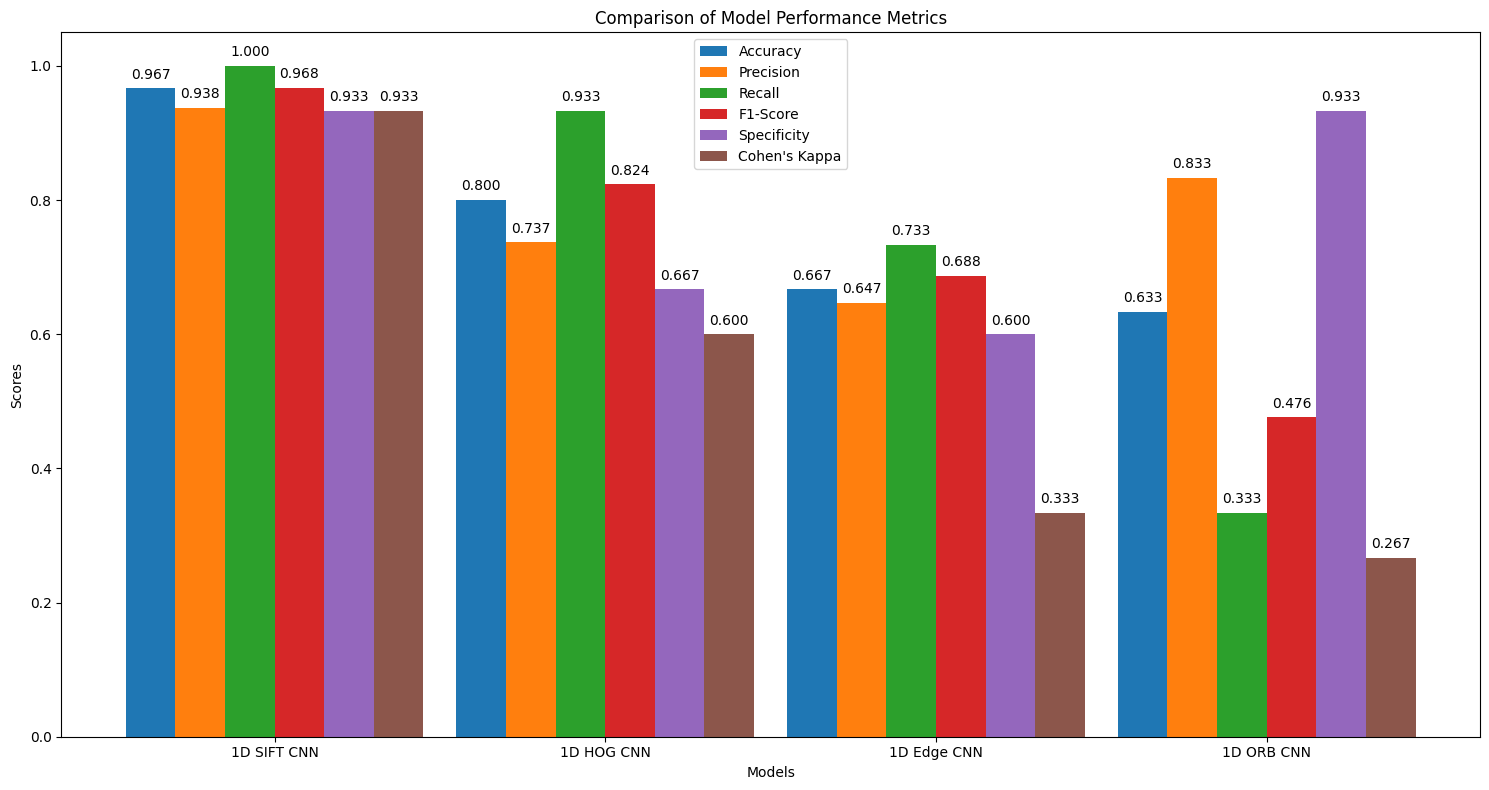

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, cohen_kappa_score

# Function to get metrics for a given model
def get_metrics_for_model(model, X_test, y_test):
    # Make predictions
    y_pred = np.round(model.predict(X_test)).astype(int).reshape(-1)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)

    # Calculate Cohen's kappa
    kappa = cohen_kappa_score(y_test, y_pred)

    return accuracy, precision, recall, f1, specificity, kappa


# Assuming you have already defined model_hog, model_edge, model_orb, and their respective test sets
# Calculate metrics for each model
metrics_list = [
    get_metrics_for_model(best_model, X_test_sift, y_test_encoded),  # SIFT
    get_metrics_for_model(model_hog, X_test_hog, y_test_encoded),    # HOG
    get_metrics_for_model(model_edge, X_test_edge, y_test_encoded),  # Edge
    get_metrics_for_model(model_orb, X_test_orb, y_test_encoded)     # ORB
]

model_names = ['1D SIFT CNN', '1D HOG CNN', '1D Edge CNN', '1D ORB CNN']

# Create bar plot
bar_width = 0.15
index = np.arange(len(model_names))

plt.figure(figsize=(15, 8))

# Plot bars for each metric
for i, metric_name in enumerate(['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Specificity', 'Cohen\'s Kappa']):
    bars = plt.bar(index + i * bar_width, [metrics[i] for metrics in metrics_list], bar_width, label=metric_name)

    # Add numerical values on top of bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Model Performance Metrics')
plt.xticks(index + 2.5 * bar_width, model_names)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
                 Model  Accuracy  Precision    Recall  F1-Score  Specificity  \
0          1D SIFT CNN  0.966667   0.937500  1.000000  0.967742     0.933333   
1               2D CNN  0.833333   0.777778  0.933333  0.848485     0.733333   
2  Logistic Regression  0.800000   0.764706  0.866667  0.812500     0.733333   
3        Random Forest  0.700000   0.800000  0.533333  0.640000     0.866667   
4              XGBoost  0.700000   0.800000  0.533333  0.640000     0.866667   
5                  SVM  0.733333   0.705882  0.800000  0.750000     0.666667   
6                  KNN  0.833333   0.916667  0.733333  0.814815     0.933333   

   Cohen's Kappa  
0       0.933333  
1       0.666667  
2       0.600000  
3       0.400000  
4       0.400000  
5       0.466667  
6       0.666667  


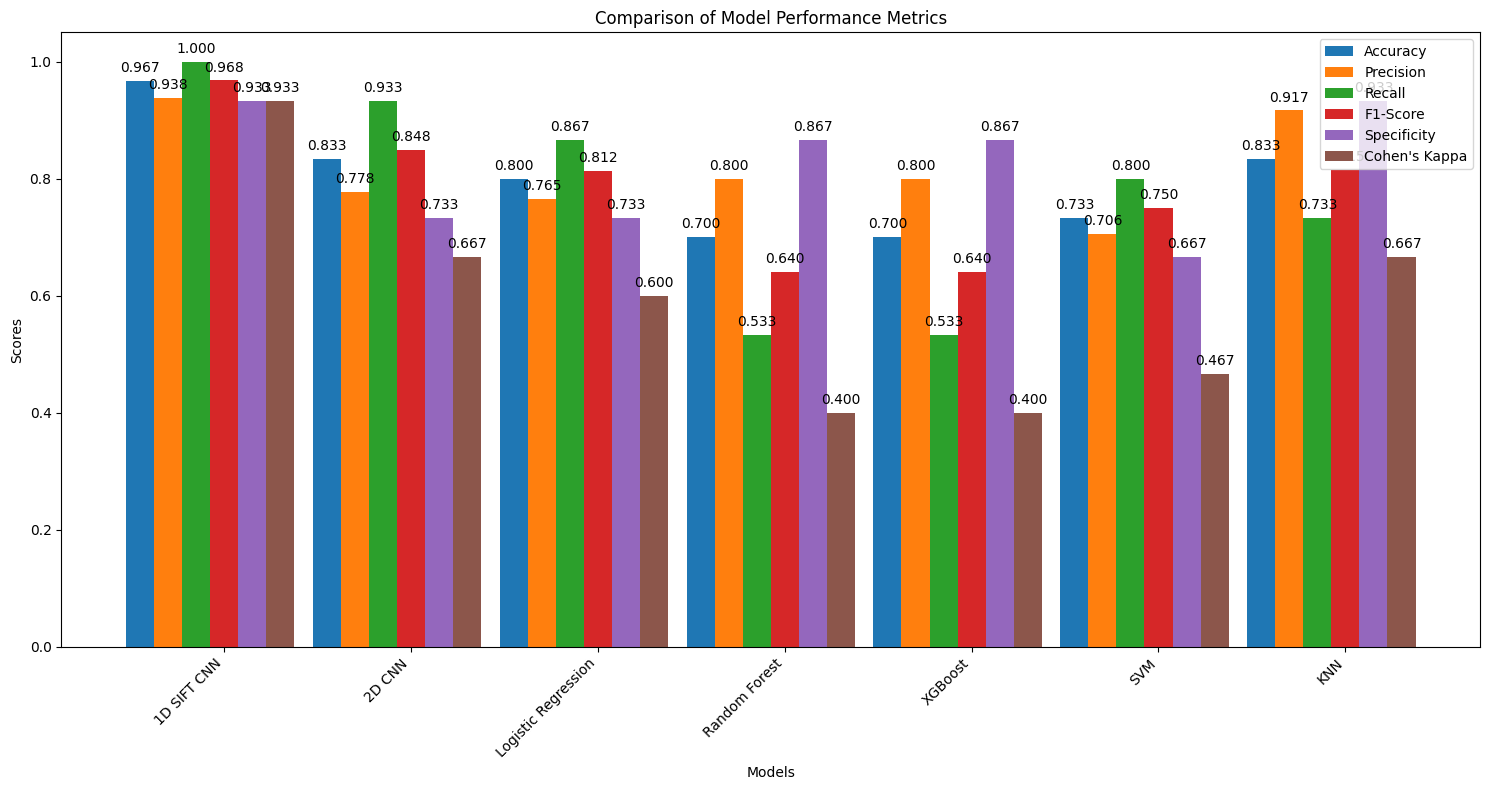

In [ ]:
#  compare 1d sift cnn best model, 2dcnn,logistic regression,random forest,xgboost,svm,knn


# Define a list of models and their names
models = [
    (best_model, X_test_sift, y_test_encoded, '1D SIFT CNN'),
    (model_2d_cnn, X_test_hog_2d, y_test, '2D CNN'),
    (model_lr, X_test_hog, y_test, 'Logistic Regression'),
    (model_rf, X_test_hog, y_test, 'Random Forest'),
    (model_xgb, X_test_hog, y_test, 'XGBoost'),
    (model_svm, X_test_hog, y_test, 'SVM'),
    (model_knn, X_test_hog, y_test, 'KNN')
]

# Function to get metrics for a given model
def get_metrics_for_model(model, X_test, y_test):
    if isinstance(model, tf.keras.Sequential):
        y_pred_prob = model.predict(X_test)
        y_pred = (y_pred_prob > 0.5).astype(int)
        if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:
            y_pred = np.argmax(y_pred, axis=1)
        else:
            y_pred = y_pred.reshape(-1)
    else:
        y_pred = model.predict(X_test.reshape(X_test.shape[0], -1))

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    kappa = cohen_kappa_score(y_test, y_pred)

    return accuracy, precision, recall, f1, specificity, kappa

# Create a list to store the results for each model
model_results = []
for model, X_test, y_test, model_name in models:
    accuracy, precision, recall, f1, specificity, kappa = get_metrics_for_model(model, X_test, y_test)
    model_results.append([model_name, accuracy, precision, recall, f1, specificity, kappa])

# Create a DataFrame to display the results
df_results = pd.DataFrame(model_results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Specificity', 'Cohen\'s Kappa'])

# Print the results
print(df_results)

# Create bar plot
bar_width = 0.15
index = np.arange(len(df_results['Model']))

plt.figure(figsize=(15, 8))

# Plot bars for each metric
for i, metric_name in enumerate(['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Specificity', 'Cohen\'s Kappa']):
    bars = plt.bar(index + i * bar_width, df_results[metric_name], bar_width, label=metric_name)

    # Add numerical values on top of bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Model Performance Metrics')
plt.xticks(index + 3 * bar_width, df_results['Model'], rotation=45, ha='right')  # Rotate x-axis labels
plt.legend(loc='best')
plt.tight_layout()
plt.show()


code here